In [1]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
data_root = Path("/home/haim/code/tumors/data/")
mask_root = data_root / "segmentations"

In [43]:
ct_image_paths = [
    (Path(root) / file).relative_to(data_root)
    for root, _, files in data_root.walk()
    for file in files
    if "vol" in file
]
ct_image_paths

[PosixPath('volumes/volume-32.nii'),
 PosixPath('volumes/volume-43.nii'),
 PosixPath('volumes/volume-46.nii'),
 PosixPath('volumes/volume-5.nii'),
 PosixPath('volumes/volume-26.nii'),
 PosixPath('volumes/volume-14.nii'),
 PosixPath('volumes/volume-23.nii'),
 PosixPath('volumes/volume-47.nii'),
 PosixPath('volumes/volume-12.nii'),
 PosixPath('volumes/volume-22.nii'),
 PosixPath('volumes/volume-25.nii'),
 PosixPath('volumes/volume-39.nii'),
 PosixPath('volumes/volume-42.nii'),
 PosixPath('volumes/volume-13.nii'),
 PosixPath('volumes/volume-16.nii'),
 PosixPath('volumes/volume-15.nii'),
 PosixPath('volumes/volume-24.nii'),
 PosixPath('volumes/volume-36.nii'),
 PosixPath('volumes/volume-19.nii'),
 PosixPath('volumes/volume-0.nii'),
 PosixPath('volumes/volume-37.nii'),
 PosixPath('volumes/volume-20.nii'),
 PosixPath('volumes/volume-33.nii'),
 PosixPath('volumes/volume-2.nii'),
 PosixPath('volumes/volume-35.nii'),
 PosixPath('volumes/volume-17.nii'),
 PosixPath('volumes/volume-10.nii'),
 Pos

In [45]:
import pandas as pd

import re

def extract_volume_number(file_path: str) -> str:
    """
    Extract the volume number from a given file path.

    Args:
    file_path (str): The file path containing the volume number.

    Returns:
    _ (str): The extracted volume number, or None if the pattern is not found.
    """
    match = re.search(r'volume-(\d+)\.nii', file_path)
    return int(match.group(1)) if match else None


df = pd.DataFrame(
    {
        "image_path": ct_image_paths,
        "volume": [extract_volume_number(str(image_path)) for image_path in ct_image_paths],
    },
)
df["segment_path"] = df["volume"].apply(lambda volume: Path("segmentations") / f"segmentation-{volume}.nii")
df = df.set_index("volume").sort_index()
df.to_csv("image_and_segment_paths.csv")
df.head()

,image_path,segment_path
volume,,
0,volumes/volume-0.nii,segmentations/segmentation-0.nii
1,volumes/volume-1.nii,segmentations/segmentation-1.nii
2,volumes/volume-2.nii,segmentations/segmentation-2.nii
3,volumes/volume-3.nii,segmentations/segmentation-3.nii
4,volumes/volume-4.nii,segmentations/segmentation-4.nii


In [8]:
shapes = []

for image_path in ct_image_paths
    img = nib.load(image_path)
    shapes.append(img.get_fdata().shape)


In [12]:
import re

def extract_volume_number(file_path: str) -> str:
    """
    Extract the volume number from a given file path.

    Args:
    file_path (str): The file path containing the volume number.

    Returns:
    str: The extracted volume number, or None if the pattern is not found.
    """
    match = re.search(r'volume-(\d+)\.nii', file_path)
    return match.group(1) if match else None


None
9
180


In [9]:
dims = [shape[-1] for shape in shapes]
np.max(dims)

861

In [3]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
data_root = Path("/home/haim/code/tumors/data/")

filepath = Path("/home/haim/code/tumors/data/volumes/volume-0.nii")

img = nib.load(filepath)
img_data = img.get_fdata()
print(img_data.shape)

(512, 512, 75)
[[  -0.703125     0.           0.         172.8999939]
 [   0.           0.703125     0.        -179.296875 ]
 [   0.           0.           5.        -368.       ]
 [   0.           0.           0.           1.       ]]


In [8]:
img_data.shape

(512, 512, 75)

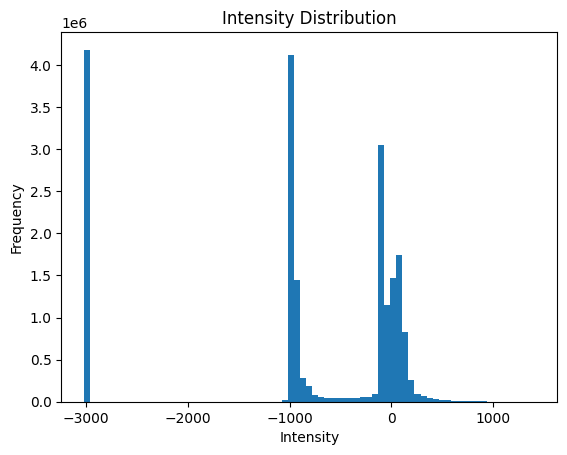

In [5]:
mean_intensity = np.mean(img_data)
median_intensity = np.median(img_data)
std_intensity = np.std(img_data)

plt.hist(img_data.flatten(), bins=75)
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

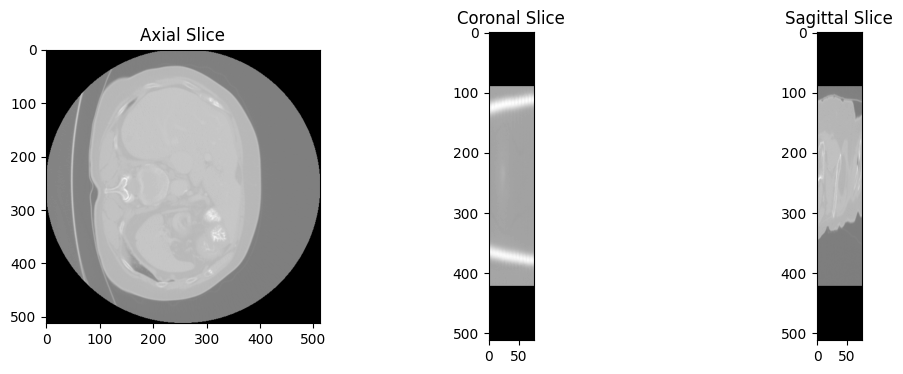

In [6]:
plt.figure(figsize=(12, 4))
idx = 60
# Axial slice
plt.subplot(1, 3, 1)
plt.imshow(img_data[:, :, idx], cmap='gray')
plt.title('Axial Slice')

# Coronal slice
plt.subplot(1, 3, 2)
plt.imshow(img_data[:, idx, :], cmap='gray')
plt.title('Coronal Slice')

# Sagittal slice
plt.subplot(1, 3, 3)
plt.imshow(img_data[idx, :, :], cmap='gray')
plt.title('Sagittal Slice')

plt.show()


In [7]:
liver_segment_filepath = Path("/home/haim/code/tumors/data/segmentations/segmentation-0.nii")
liver_segment = nib.load(liver_segment_filepath)
liver_array = liver_segment.get_fdata()

mask = liver_array.copy()
mask[mask == 0] = np.nan

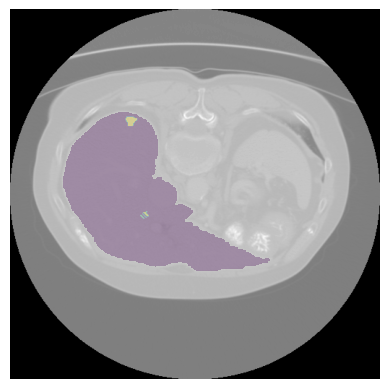

In [8]:
idx = 60
# plt.figure(figsize=(10, 10))
plt.imshow(img_data[:, :, idx].T, cmap="gray")
plt.imshow(mask[:, :, idx].T, cmap="viridis", alpha=0.3)

plt.axis('off')
plt.show()

### Importance of Windowing in CT Liver and Tumor Segmentation

In CT imaging, the range of pixel intensities can be very broad, often encompassing values that are not relevant to the structures of interest, 
such as the liver and tumors.

Windowing is a crucial preprocessing step that enhances the visualization of specific tissues by adjusting the 
brightness and contrast of the image. 

By selecting an appropriate window level and width, we can focus on the intensity range that best represents the liver tissue, making it easier 
to differentiate it from surrounding tissues and other structures. This enhanced visualization is particularly important for accurate 
segmentation of the liver and tumors, as it allows for more precise identification and delineation of the regions of interest. 

Without windowing, the broad range of intensities might obscure critical details, leading to suboptimal segmentation results.

### Windowing Equation

The windowing process can be described by the following equation:

${\text{windowed}} = \left( \frac{\text{clip}(I_{\text{original}}, L - \frac{W}{2}, L + \frac{W}{2}) - (L - \frac{W}{2})}{W} \right) \times 255$

where:
- $I_{\text{windowed}}$ is the resulting windowed image.
- $I_{\text{original}}$ is the original image.
- $L$ is the window level (center of the window).
- $W$ is the window width (range of the window).
- $clip(x, a, b)$ is the function that limits $x$ to be within the range $[a, b]$.

This equation scales the pixel values within the specified window to the range $[0, 255]$ for visualization purposes.


In [9]:
def window_image(image: np.ndarray, window_level: float, window_width: float) -> np.ndarray:
    """
    Apply windowing to a CT image for better visualization.

    Args:
        image (np.ndarray): The input CT image as a NumPy array.
        window_level (float): The center of the windowing range.
        window_width (float): The width of the windowing range.

    Returns:
        np.ndarray: The windowed image normalized to the range [0, 255] as a NumPy array.
    """
    min_intensity: float = window_level - (window_width / 2)
    max_intensity: float = window_level + (window_width / 2)
    
    windowed_image = np.clip(image, min_intensity, max_intensity)
    windowed_image = (
        (windowed_image - min_intensity) / (max_intensity - min_intensity) * 255
        ).astype(np.uint8)
    
    return windowed_image

In [10]:
windowed_image: np.ndarray = window_image(img_data, 30, 150)

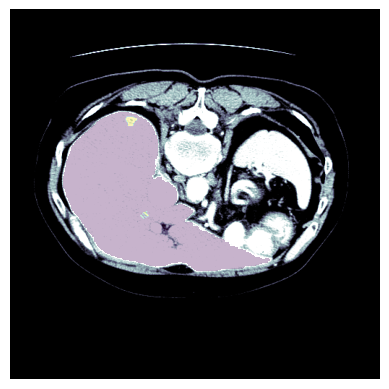

In [11]:
plt.imshow(windowed_image[:, :, idx].T, cmap="bone")
plt.imshow(mask[:, :, idx].T, cmap="viridis", alpha=0.3)
plt.axis('off')
plt.show()

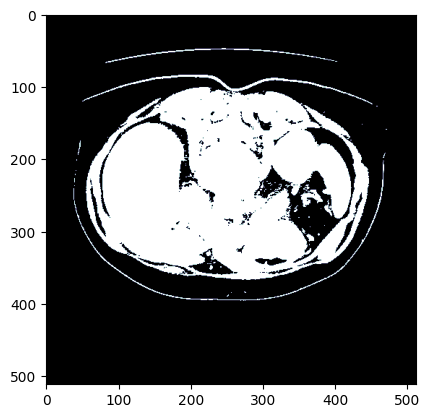

In [12]:
plt.imshow(
    liver_array[:, :, 55].T != windowed_image[:, :, 55].T,
    cmap="bone"
    )

In [14]:
import torch

img = torch.Tensor([[windowed_image]])

/tmp/ipykernel_94187/1502652415.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  img = torch.Tensor([[windowed_image]])


In [16]:
img_permuted = img.permute(0, 1, 4, 2, 3)

In [17]:
# [batch, channel, D, H, W]
# [batch, channel, H, W]
# img_permuted.shape

torch.Size([1, 1, 75, 512, 512])

In [15]:
# import torch
# from monai.networks.nets.unetr import UNETR

# model = UNETR(
#     in_channels=1,
#     out_channels=3,
#     img_size=[861, 512, 512],
#     feature_size=10,
#     hidden_size=53,
#     mlp_dim=3072,
#     num_heads=1,
#     spatial_dims=3,
# )
# model(torch.rand([1, 861, 512, 512]))

RuntimeError: The size of tensor a (1024) must match the size of tensor b (54272) at non-singleton dimension 1

In [14]:
from monai.networks.nets import UNet

net=UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    channels=img_data.shape,
    strides=(2, 2, 2, 2),
)

/home/haim/code/tumors/liver_tumors/.venv/lib/python3.12/site-packages/monai/networks/nets/unet.py:133: UserWarning: `len(strides) > len(channels) - 1`, the last 2 values of strides will not be used.
  warnings.warn(f"`len(strides) > len(channels) - 1`, the last {delta} values of strides will not be used.")


In [15]:
import torch

net(torch.tensor([img_data], dtype=torch.float))

: 